# Linear Regression

**Importing dependencies**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

**Prepare and analize data**

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

print(data.head())
print(data.info())
print(data.isnull().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Features and label**

In [4]:
X = data.drop("quality", axis=1)
y = data["quality"]

**Feature engineering**

In [5]:
X["total_acidity"] = X["fixed acidity"] + X["volatile acidity"] + X["citric acid"]
X["sulphate_to_ph"] = X["sulphates"] / X["pH"]

**Feature scaling**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split the data into training, validation, and test sets**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

**Base model training with default hyperparameters**

In [8]:
base_model = SGDRegressor()
base_model.fit(X_train, y_train)

SGDRegressor()

**Base model score**

In [9]:
base_pred = base_model.predict(X_val)
base_mse = mean_squared_error(y_val, base_pred)
r2 = r2_score(y_val, base_pred)
print("Mean Squared Error (base model):", base_mse)
print(f"R^2 Score(base model): {r2}")

Mean Squared Error (base model): 0.455829239625358
R^2 Score(base model): 0.2817941847696349


**Hyperparameters search**

In [10]:
params = {"fit_intercept": [True, False], "penalty": ["l1", "l2"]}
grid_search = GridSearchCV(SGDRegressor(), params, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

**Model score with optimal hyperparameters**

In [11]:
best_pred = best_model.predict(X_val)
best_mse = mean_squared_error(y_val, best_pred)
best_r2 = r2_score(y_val, best_pred)
print("Mean Squared Error (best model):", best_mse)
print("R-squared (best model):", best_r2)

Mean Squared Error (best model): 0.4528313252190944
R-squared (best model): 0.2865177070296615


**Visualization**

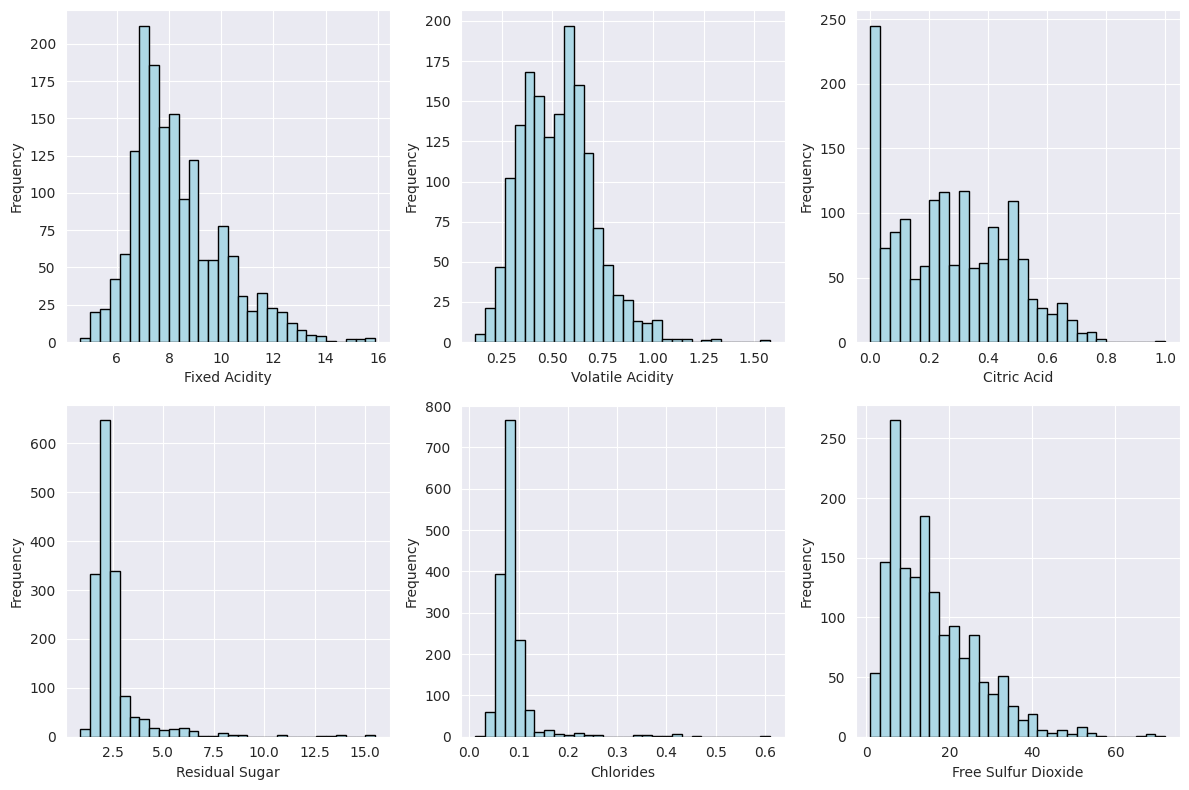

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Fixed acidity
axes[0, 0].hist(data["fixed acidity"], bins=30, color="lightblue", edgecolor="black")
axes[0, 0].set_xlabel("Fixed Acidity")
axes[0, 0].set_ylabel("Frequency")

# Volatile acidity
axes[0, 1].hist(data["volatile acidity"], bins=30, color="lightblue", edgecolor="black")
axes[0, 1].set_xlabel("Volatile Acidity")
axes[0, 1].set_ylabel("Frequency")

# Citric acid
axes[0, 2].hist(data["citric acid"], bins=30, color="lightblue", edgecolor="black")
axes[0, 2].set_xlabel("Citric Acid")
axes[0, 2].set_ylabel("Frequency")

# Residual sugar
axes[1, 0].hist(data["residual sugar"], bins=30, color="lightblue", edgecolor="black")
axes[1, 0].set_xlabel("Residual Sugar")
axes[1, 0].set_ylabel("Frequency")

# Chlorides
axes[1, 1].hist(data["chlorides"], bins=30, color="lightblue", edgecolor="black")
axes[1, 1].set_xlabel("Chlorides")
axes[1, 1].set_ylabel("Frequency")

# Free sulfur dioxide
axes[1, 2].hist(
    data["free sulfur dioxide"], bins=30, color="lightblue", edgecolor="black"
)
axes[1, 2].set_xlabel("Free Sulfur Dioxide")
axes[1, 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()